# Pharmaceutical Sales Prediction Across Multiple Stores

You work at Rossmann Pharmaceuticals as a data scientist. The finance team wants to forecast sales in all their stores across several cities six weeks ahead of time. Managers in individual stores rely on their years of experience as well as their personal judgement to forecast sales. 

The data team identified factors such as promotions, competition, school and state holidays, seasonality, and locality as necessary for predicting the sales across the various stores.

Your job is to build and serve an end-to-end product that delivers this prediction to Analysts in the finance team. 


## Task 1 - Exploration of Customer Purchasing Behavior

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset

In [2]:
## Converting the date column to the datetime format
#date column to index
train_data= pd.read_csv('train.csv', parse_dates= ['Date'], index_col= ['Date'])
test_data = pd.read_csv('test.csv', parse_dates= ['Date'], index_col= ['Date'])
store_data = pd.read_csv('store.csv')

C:\Users\SHOLAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data overview

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [5]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [7]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Convert all categorical columns to object across the three datasets

In [8]:
## Converting categorical columns in train set into category
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
for i in train_cols:
    train_data = train_data.astype({i:'object'})

In [9]:
## Converting categorical columns in test set into category
for i in train_cols:
    test_data = test_data.astype({i:'object'})

In [10]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
for i in store_cols:
    store_data = store_data.astype({i:'object'})

# Check for seasonality in both training and test sets - are the seasons similar between these two groups?

In [11]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Unique store

In [12]:
# Sum of unique store
len(train_data.Store.unique())

1115

#### Replacing values to deal with Cardinality

In [13]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

# Data Exploration

In [14]:
train_desc= train_data.describe().round(2)
train_desc

,Store,Sales,Customers
count,1017209.00,1017209.00,1017209.00
mean,558.43,5773.82,633.15
std,321.91,3849.93,464.41
min,1.00,0.00,0.00
25%,280.00,3727.00,405.00
50%,558.00,5744.00,609.00
75%,838.00,7856.00,837.00
max,1115.00,41551.00,7388.00


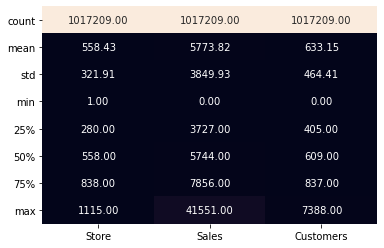

In [15]:
# plt.figure(figsize= (17, 6))
sns.heatmap(train_desc, annot= True, fmt= '.2f', cbar= False)

In [16]:
test_desc= test_data.describe().round()
test_desc

,Id,Store
count,41088.0,41088.0
mean,20544.0,556.0
std,11861.0,320.0
min,1.0,1.0
25%,10273.0,280.0
50%,20544.0,554.0
75%,30816.0,832.0
max,41088.0,1115.0


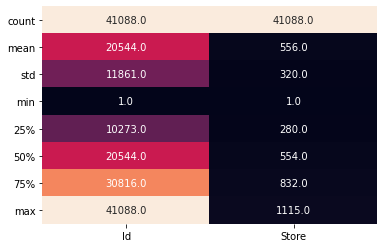

In [17]:
sns.heatmap(test_desc, annot= True, fmt= '.1f', cbar= False)

In [18]:
store_desc= store_data.describe().round(2)
store_desc

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,571.00,571.00
mean,558.00,5404.90,2008.67,23.60,2011.76
std,322.02,7663.17,6.20,14.14,1.67
min,1.00,20.00,1900.00,1.00,2009.00
25%,279.50,717.50,2006.00,13.00,2011.00
50%,558.00,2325.00,2010.00,22.00,2012.00
75%,836.50,6882.50,2013.00,37.00,2013.00
max,1115.00,75860.00,2015.00,50.00,2015.00


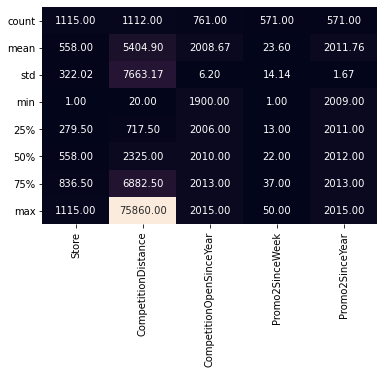

In [19]:
sns.heatmap(store_desc, fmt= ".2f", annot= True, cbar= False)

In [20]:
dayofweek= train_data.groupby([train_data.index.year,'DayOfWeek']).sum()[['Sales', 'Customers']] 

In [21]:
dayofweek

Sales  Customers
Date DayOfWeek                      
2013 1          448805308   47489818
     2          394617586   43596216
     3          366055367   40938485
     4          357566151   40344847
     5          391034639   43756930
     6          334045822   37957127
     7           10751211    1921002
2014 1          421902297   44079573
     2          385086977   41962971
     3          357302036   39472568
     4          334780996   37755953
     5          359487036   39908183
     6          310593431   35267665
     7           11652123    2042058
2015 1          259495407   26105621
     2          240707367   25288876
     3          231605460   24706589
     4          218830562   23632138
     5          230034266   24719707
     6          201678482   21879062
     7            7148099    1216366

# Sales Distribution

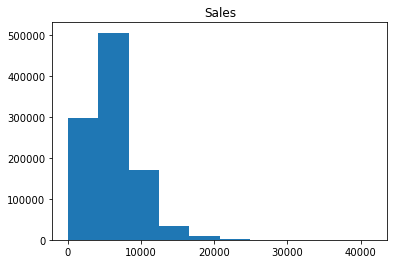

In [22]:
plt.hist(train_data['Sales'])
plt.title("Sales");

**The shape of the above sales distribution is right skewness**

### Data record in each year

Text(0.5, 0, 'Year')

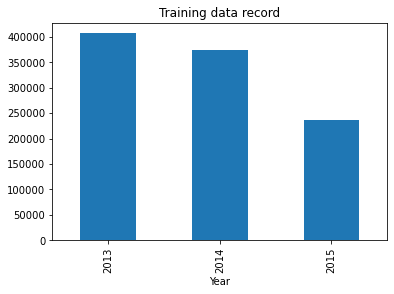

In [23]:
train_data.index.year.value_counts().plot.bar().set_title("Training data record")
plt.xlabel('Year')
# Overview of the data store in each year by counting their occurrence

Text(0.5, 0, 'Year')

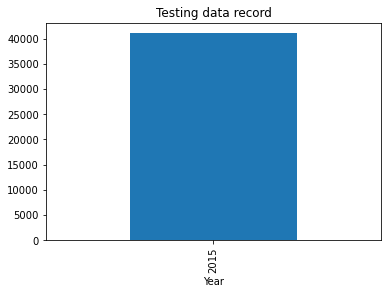

In [24]:
test_data.index.year.value_counts().plot.bar().set_title("Testing data record")
plt.xlabel('Year')
# Overview of the data store in each year by counting their occurrence

# Seasonality Analysis

Text(0.5, 1.0, 'Sales per day')

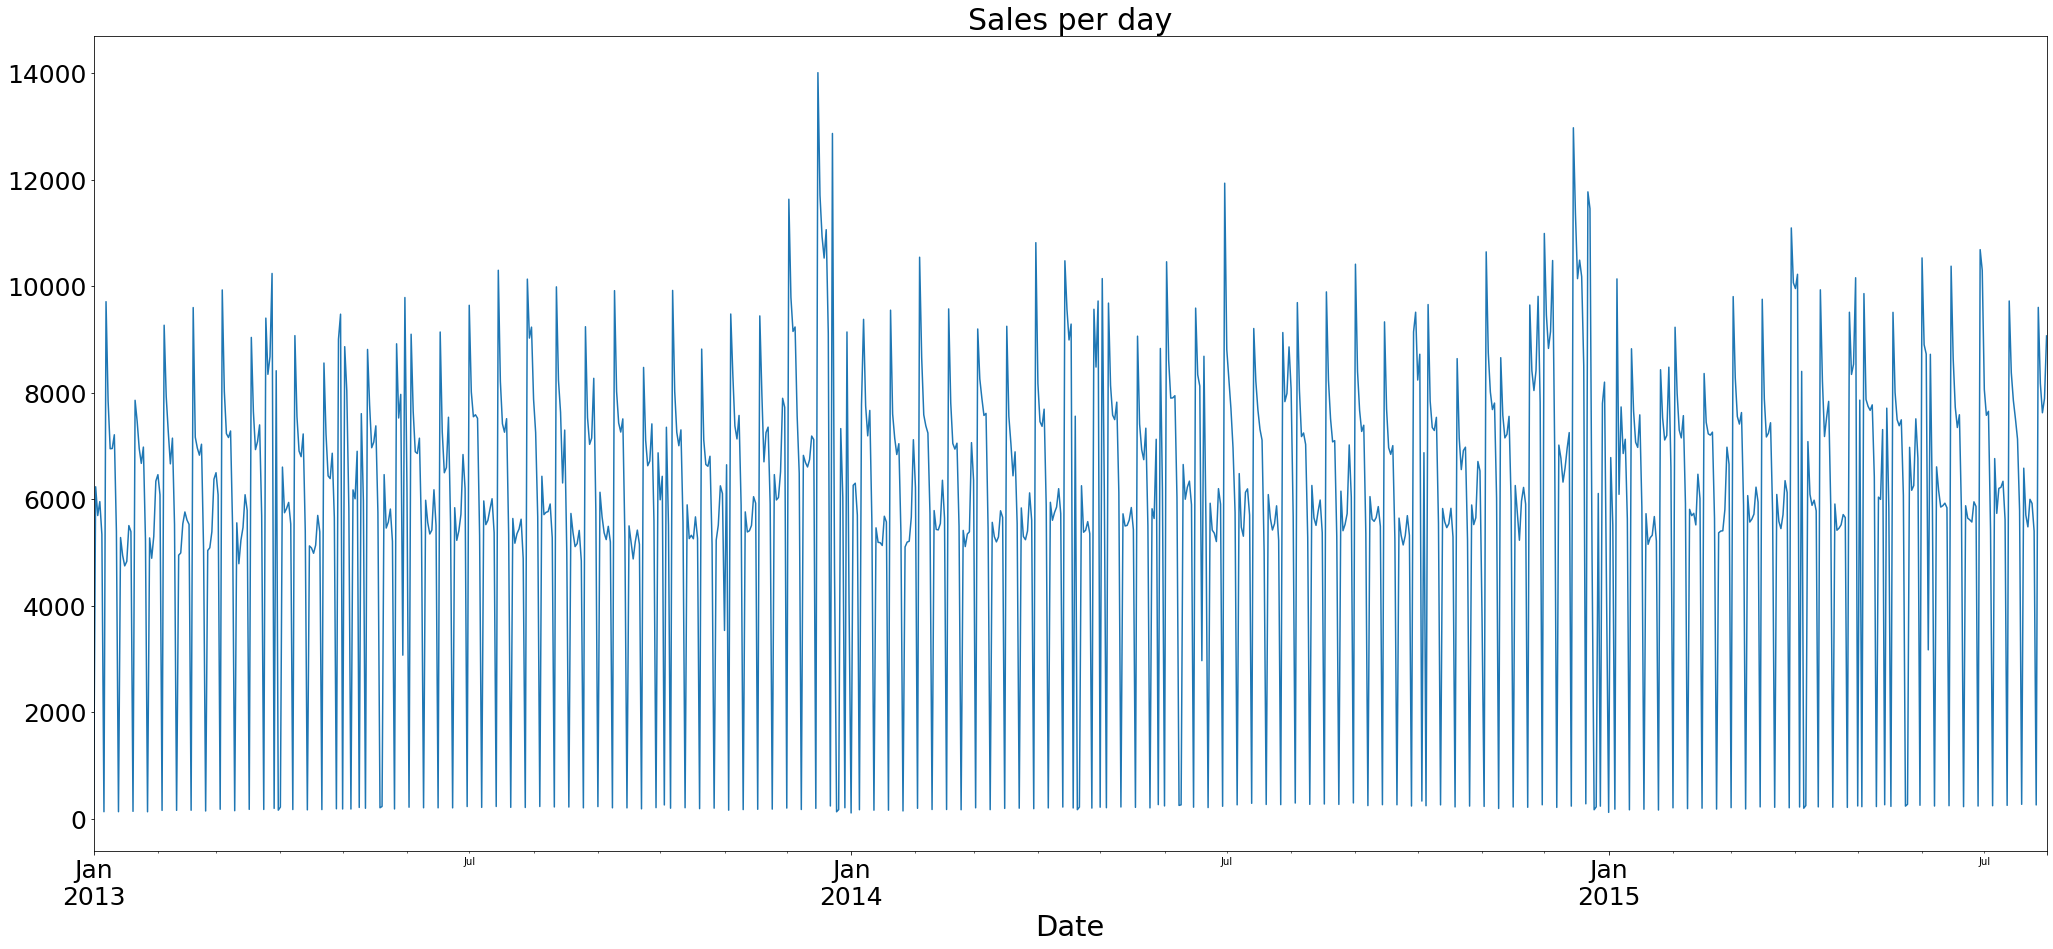

In [25]:
# Day sales for the seasonality analysis
daily_sales= train_data['Sales'].resample('d').mean()
daily_sales.plot(figsize=(35,15)).set_xlabel('Date', fontsize= 29)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.title('Sales per day', fontsize= 30)

Text(0.5, 1.0, 'Sales per week')

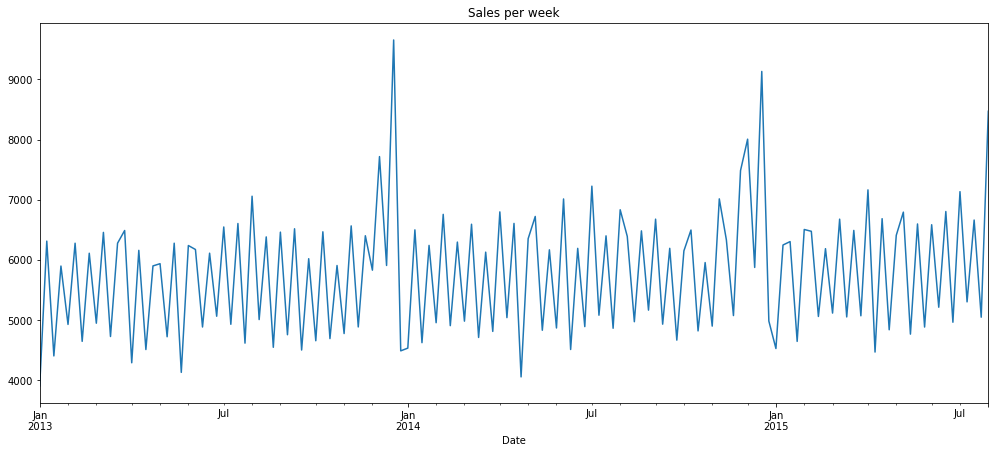

In [26]:
# Weekly sales
weekly_sales= train_data['Sales'].resample('w').mean()
weekly_sales.plot(figsize=(17,7));
plt.title('Sales per week')

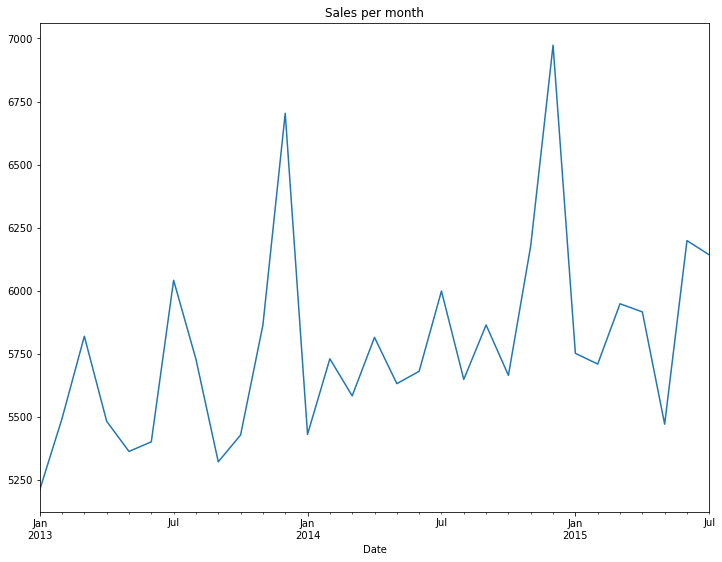

In [27]:
# Monthly sales
monthly_sales= train_data['Sales'].resample('m').mean()
monthly_sales.plot(figsize= (12, 9)).set_title("Sales per month");

From the above visualizations, it could be noticed that the sales tends to go higher in the first month of each year.
This is to test whether the number of customers will also increase.

In [28]:
print(f'2015 Train data: {len(train_data[train_data.index.year == 2015])} of {len(train_data)}')

2015 Train data: 236380 of 1017209


## There tends to be some similarities between the train dataset and test dataset. All data in test dataset were in the year 2015 whereas the train dataset also have about ```236,380``` rows of data in the year 2015 out of ```1,017,209``` rows

# Check & compare sales behavior before, during and after holidays

In [29]:
behaviour= train_data.pivot_table(index= ['StateHoliday'], values= ['Sales'], aggfunc= 'sum')

In [30]:
behaviour

,Sales
StateHoliday,
a,5890305
b,1433744
c,691806
o,5865164768


In [31]:
behaviour.index= ['Public holiday', 'Easter holiday', 'Christmas', 'None']

In [32]:
behaviour

,Sales
Public holiday,5890305
Easter holiday,1433744
Christmas,691806
None,5865164768


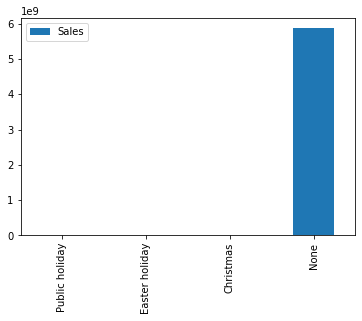

In [33]:
behaviour.plot.bar()

There is more sales before the holiday

# Find out any seasonal (Christmas, Easter etc) purchase behaviours

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

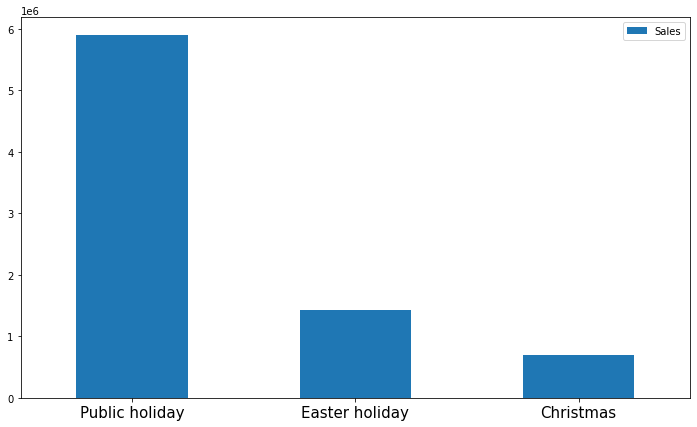

In [34]:
behaviour.iloc[:-1, :].plot.bar(figsize= (12, 7))
plt.xticks(rotation= 360, fontsize= 15)

### There tends to be more purchase during the $Public$ $holiday$

# What can you say about the correlation between sales and number of customers?

Text(0.5, 0, 'Sales')

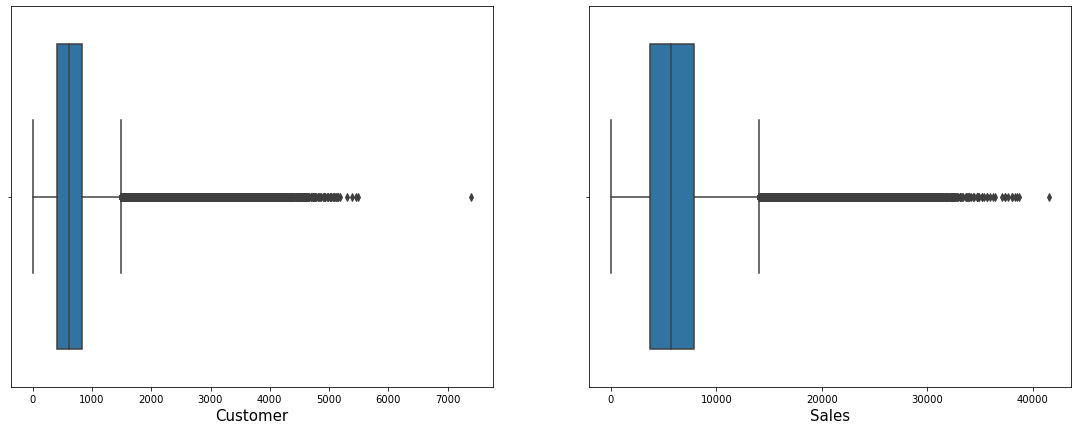

In [35]:
plt.figure(figsize= (19, 7))
plt.subplot(1, 2, 1)
sns.boxplot(train_data['Customers']).set_xlabel("Customer", fontsize= 15)
plt.subplot(1, 2, 2)
sns.boxplot(train_data['Sales']).set_xlabel("Sales", fontsize= 15)

Text(0.5, 1.0, 'Sales vs Customers')

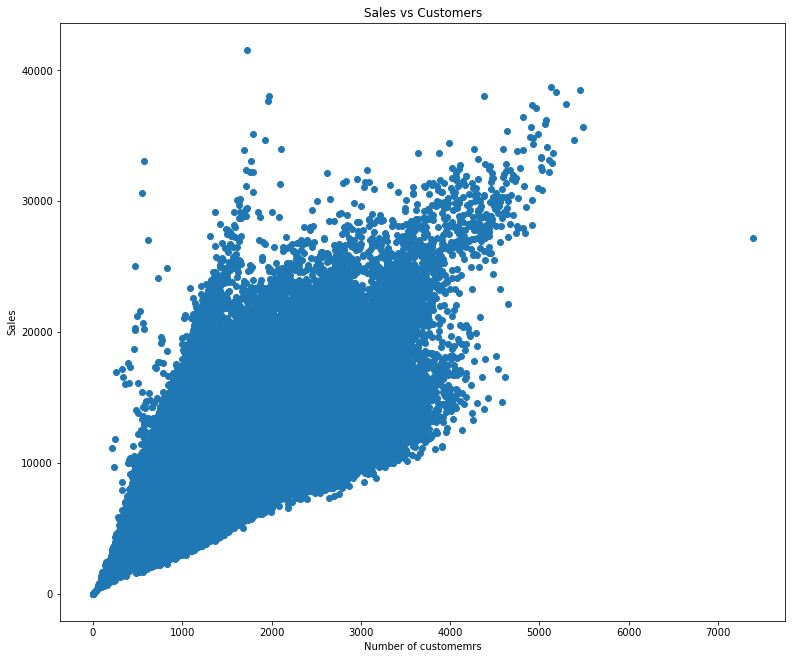

In [36]:
plt.figure(figsize= (13, 11))
plt.scatter( train_data['Customers'], train_data['Sales'])
plt.ylabel("Sales")
plt.xlabel("Number of customemrs")
plt.title("Sales vs Customers")

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

No promo

In [37]:
no_promo= train_data[train_data['Promo']==0]
no_promo.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1
2013-01-01,1115,2,0,0,0,0,a,1


Text(0.5, 1.0, 'Customers when there is no promo')

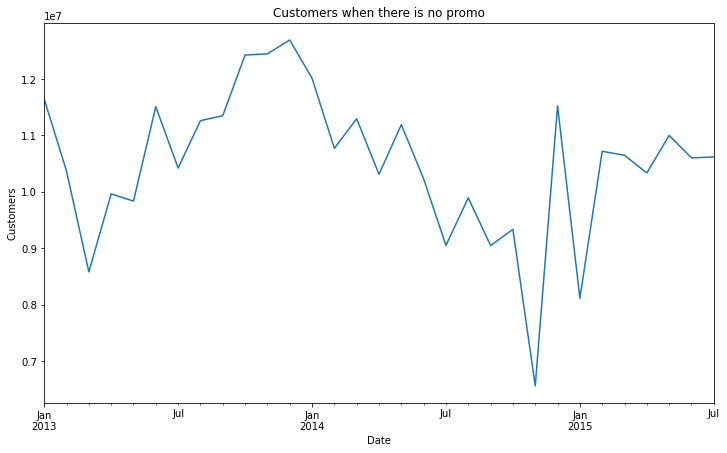

In [38]:
no_promo['Customers'].resample('m').sum().plot(figsize= (12, 7))
plt.ylabel('Customers')
plt.title('Customers when there is no promo')

With promo

In [39]:
promo= train_data[train_data['Promo']== 1]
promo.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,o,1
2015-07-31,2,5,6064,625,1,1,o,1
2015-07-31,3,5,8314,821,1,1,o,1
2015-07-31,4,5,13995,1498,1,1,o,1
2015-07-31,5,5,4822,559,1,1,o,1


Text(0.5, 1.0, 'Customers when promo is going on')

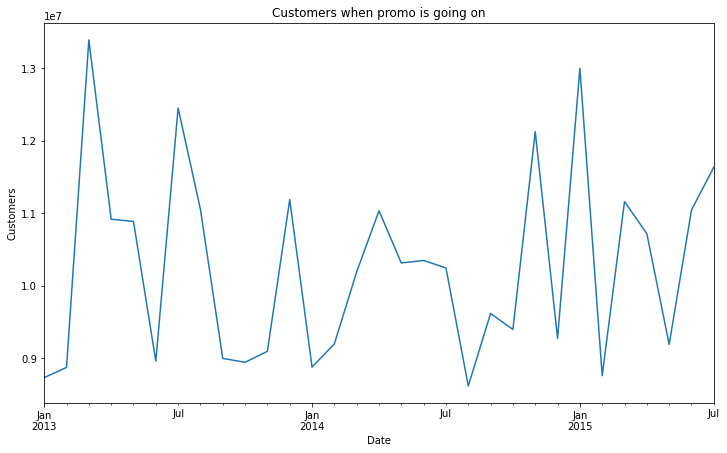

In [40]:
promo['Customers'].resample('m').sum().plot(figsize= (12, 7))
plt.ylabel('Customers')
plt.title('Customers when promo is going on')

# Trends of customer behavior during store open and closing times

In [41]:
train_data.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,o,1
2015-07-31,2,5,6064,625,1,1,o,1


In [42]:
# Store open and close data
store_open= train_data[train_data['Open'] == 1]
store_close= train_data[train_data['Open'] == 0]

In [48]:
store_open.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,o,1
2015-07-31,2,5,6064,625,1,1,o,1
2015-07-31,3,5,8314,821,1,1,o,1
2015-07-31,4,5,13995,1498,1,1,o,1
2015-07-31,5,5,4822,559,1,1,o,1


Text(0.5, 1.0, 'Cusomers behaviour when store was opened')

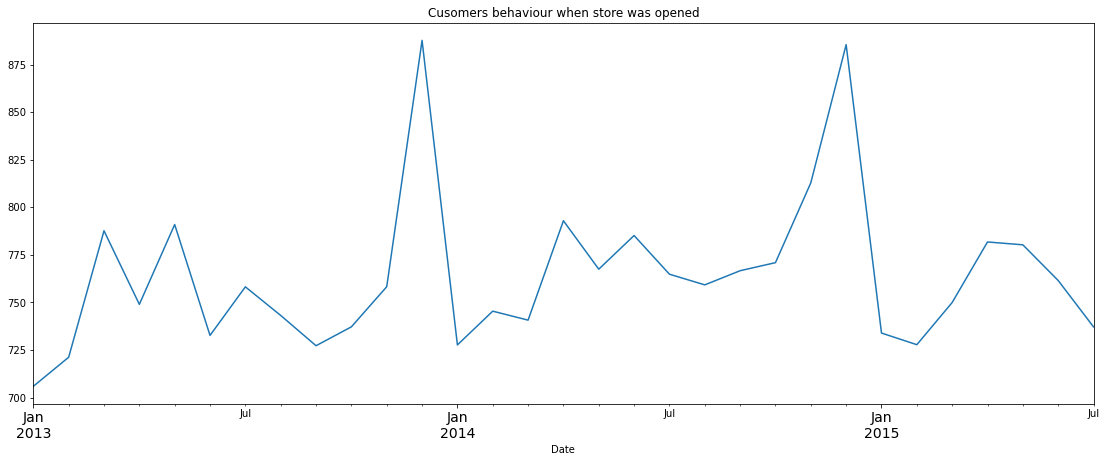

In [43]:
# Customers behaviour when store was opened
store_open['Customers'].resample('m').mean().plot(figsize= (19, 7))
plt.xticks(fontsize= 14)
plt.title('Cusomers behaviour when store was opened')

In [51]:
store_close.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,292,5,0,0,0,1,o,1
2015-07-31,876,5,0,0,0,1,o,1
2015-07-30,292,4,0,0,0,1,o,1
2015-07-30,876,4,0,0,0,1,o,1
2015-07-29,292,3,0,0,0,1,o,1


Text(0.5, 1.0, 'Cusomers behaviour when store was closed')

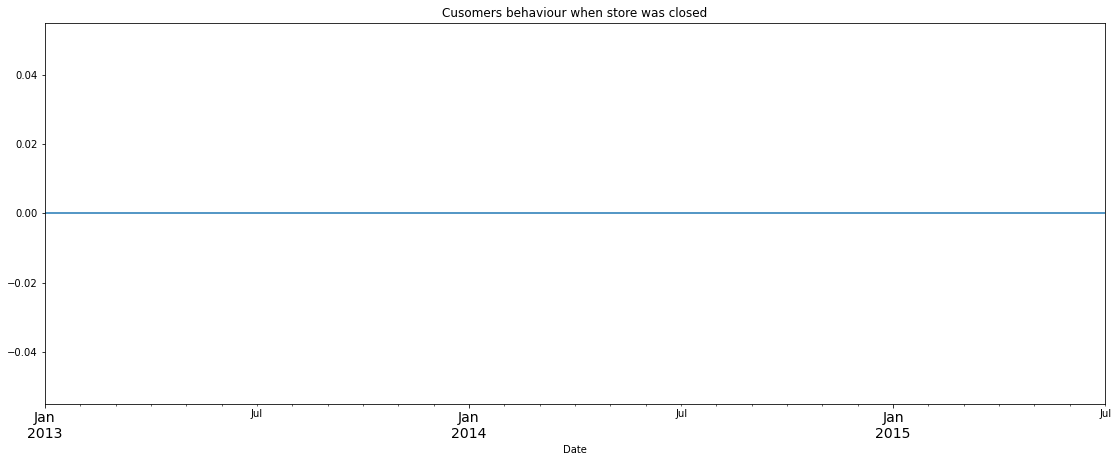

In [47]:
# Customers behaviour when store was opened
store_close['Customers'].resample('m').mean().plot(figsize= (19, 7))
plt.xticks(fontsize= 14)
plt.title('Cusomers behaviour when store was closed')

#### There is a partial increased in the number of customer when the store was opened but no customer when the store is closed.

# Top 10 Store

In [44]:
store_sales= train_data.groupby('Store')['Sales'].mean()
top10store= store_sales.to_frame().sort_values(by= 'Sales', ascending= False).head(10)
top10store

,Sales
Store,
262,20718.515924
817,18108.139066
562,17969.556263
1114,17200.196391
251,15814.087049
842,15242.114776
513,15129.942675
788,14949.194268
733,14933.288747


Text(0.5, 1.0, 'Top 10 Store sales')

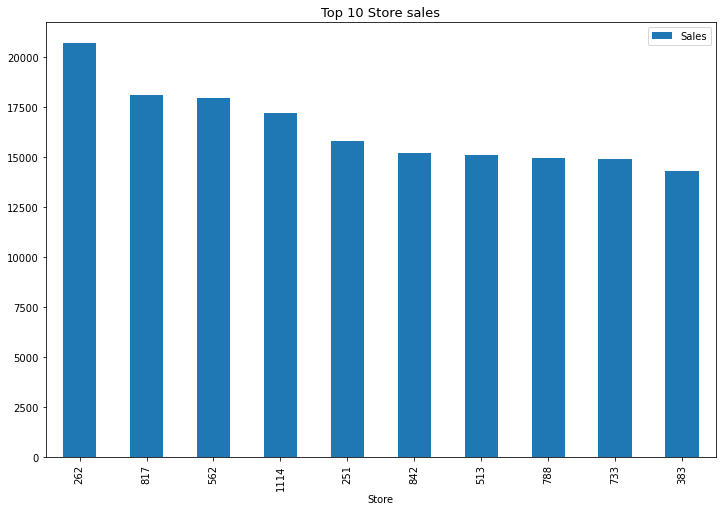

In [45]:
top10store.plot.bar(figsize= (12, 8))
plt.title('Top 10 Store sales', fontsize= 13)

# Task 2 - Prediction of store sales